In [2]:
!pip install tensorflow
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Import Libraries:

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [13]:
##just checking version of tf and keras

import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
# Data Augmentation

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/valid',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 5626 images belonging to 3 classes.
Found 1406 images belonging to 3 classes.


In [ ]:
# Build CNN Model

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
## Review the Model Summary:
# Print the summary of your model to see the details of each layer, input/output shapes, 
# and the number of parameters. This can help you identify any issues with the model architecture.

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Compile the Model

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the Model

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
175/175 [==============================] - 383s 2s/step - loss: 0.5201 - accuracy: 0.7966 - val_loss: 0.3189 - val_accuracy: 0.9099
Epoch 2/10
175/175 [==============================] - 347s 2s/step - loss: 0.1584 - accuracy: 0.9428 - val_loss: 0.1746 - val_accuracy: 0.9535
Epoch 3/10
175/175 [==============================] - 342s 2s/step - loss: 0.0962 - accuracy: 0.9651 - val_loss: 0.2190 - val_accuracy: 0.9433
Epoch 4/10
175/175 [==============================] - 347s 2s/step - loss: 0.0878 - accuracy: 0.9705 - val_loss: 0.1268 - val_accuracy: 0.9637
Epoch 5/10
175/175 [==============================] - 344s 2s/step - loss: 0.0752 - accuracy: 0.9752 - val_loss: 0.1096 - val_accuracy: 0.9629
Epoch 6/10
175/175 [==============================] - 333s 2s/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0726 - val_accuracy: 0.9753
Epoch 7/10
175/175 [==============================] - 339s 2s/step - loss: 0.0838 - accuracy: 0.9741 - val_loss: 0.0476 - val_accuracy: 0.9855

In [ ]:
# Evaluate the Model

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

eval_result = model.evaluate(test_generator)
print(f"Test Accuracy: {eval_result[1] * 100:.2f}%")


Found 12 images belonging to 3 classes.
1/1 [==============================] - 2s 2s/step - loss: 2.3464e-04 - accuracy: 1.0000
Test Accuracy: 100.00%


In [ ]:
# Visualize Training History

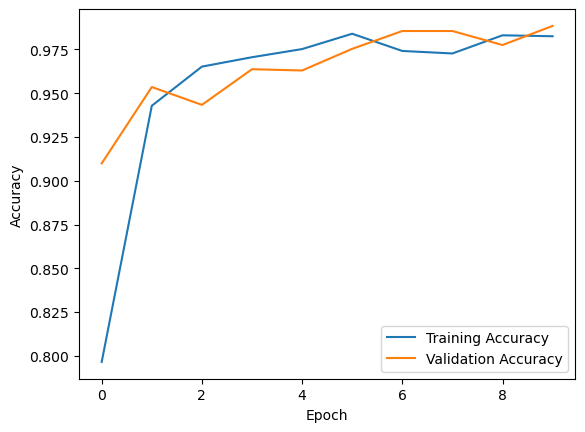

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the Trained Model

In [21]:
model.save('leaf_classification_model_1_0.keras')

In [ ]:
# Model Evaluation

In [25]:
eval_result = model.evaluate(test_generator)
print(f"Test Accuracy: {eval_result[1] * 100:.2f}%")


1/1 [==============================] - 0s 238ms/step - loss: 2.3464e-04 - accuracy: 1.0000
Test Accuracy: 100.00%
